In [1]:
import os
import numpy as np
import pandas as pd


In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinalv2.csv'
df_final = pd.read_csv(path_final, sep=';', decimal=',', encoding='utf-8',quotechar='"')
df_final.head(1)

,RowId,RowId.1,Id_do_imovel,Preco,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,Distrito_do_imovel,Preco_por_metro_quadrado,Latitude_imovel,...,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Endereco_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,geometry
0,0,0,30365582,400.0,50,0,sem elevador,AVEIRO,8.0,40.837436,...,39,40.640496,-8.653784,"Aveiro, Portugal",218.6,56.6,18,31.0,4,POINT (40.8374358 -8.6551784)


In [28]:
# Separando as colunas em numéricas e categóricas

numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df_final.select_dtypes(include=['object']).columns.tolist()
target = 'Preco'

# remove colunas
numeric_cols.remove('RowId')
numeric_cols.remove('RowId.1')
numeric_cols.remove(target)
object_cols.remove('Endereco_Municipio')
object_cols.remove('geometry')
numeric_cols.remove('Id_do_imovel')
numeric_cols.remove('Preco_por_metro_quadrado')


features = object_cols + numeric_cols
key_vars = ['Id_do_imovel']

In [29]:
features

['Indicador_de_Elevador',
 'Distrito_do_imovel',
 'Tipo_de_Certificacao_Energetica',
 'Nome_Regiao',
 'Nome_Cidade',
 'Valor_Area_util_do_imovel',
 'Numero_Andar_do_imovel',
 'Latitude_imovel',
 'Longitude_imovel',
 'Tipo_de_Construcao',
 'Numero_de_Banheiros',
 'Possui_Jardim',
 'Possui_Elevador',
 'Possui_Estacionamento',
 'Possui_Piscina',
 'Possui_Terraco',
 'Numero_de_Quartos',
 'Indicador_Anuncio_possui_planta_baixa',
 'Numero_de_fotos_do_anuncio',
 'Numero_de_videos_do_anuncio',
 'Tipo_de_Operacao',
 'Tipo_de_proprietario',
 'Numero_Faixa_Etaria_0-14',
 'Numero_Faixa_Etaria_15-64',
 'Numero_Faixa_Etaria_>65',
 'Percentual_Faixa_Etaria_0-14',
 'Percentual_Faixa_Etaria_15-64',
 'Percentual_Faixa_Etaria_>65',
 'Densidade_populacional_por_Km',
 'Densidade_populacional_Estrangeiros',
 'Quantidade_Hospitais_(Particulares_e_Publicos)',
 'Quantidade_Farmacias',
 'Quantidade_Construcoes_Novas',
 'Quantidade_Escolas_Pre-Escolar_(4-6_anos)',
 'Quantidade_Escolas_Ciclo_1_(6-10_anos)',
 'Qua

In [30]:
# Separamos o dataframe em features (X) e target (y)
target = 'Preco'


X = df_final[features + [target] + key_vars]
y = df_final[target]

In [31]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [32]:
X.columns


Index(['Indicador_de_Elevador', 'Distrito_do_imovel',
       'Tipo_de_Certificacao_Energetica', 'Nome_Regiao', 'Nome_Cidade',
       'Valor_Area_util_do_imovel', 'Numero_Andar_do_imovel',
       'Latitude_imovel', 'Longitude_imovel', 'Tipo_de_Construcao',
       'Numero_de_Banheiros', 'Possui_Jardim', 'Possui_Elevador',
       'Possui_Estacionamento', 'Possui_Piscina', 'Possui_Terraco',
       'Numero_de_Quartos', 'Indicador_Anuncio_possui_planta_baixa',
       'Numero_de_fotos_do_anuncio', 'Numero_de_videos_do_anuncio',
       'Tipo_de_Operacao', 'Tipo_de_proprietario', 'Numero_Faixa_Etaria_0-14',
       'Numero_Faixa_Etaria_15-64', 'Numero_Faixa_Etaria_>65',
       'Percentual_Faixa_Etaria_0-14', 'Percentual_Faixa_Etaria_15-64',
       'Percentual_Faixa_Etaria_>65', 'Densidade_populacional_por_Km',
       'Densidade_populacional_Estrangeiros',
       'Quantidade_Hospitais_(Particulares_e_Publicos)',
       'Quantidade_Farmacias', 'Quantidade_Construcoes_Novas',
       'Quantidade_Esc

# Instalando o Pycaret no Colab
Vamos instalar a versão completa pycaret de acordo com as instruções na installation page

In [9]:
!pip install pycaret[full]==3.0.1

In [33]:
# importando todas as funções do módulo classification da biblioteca pycaret
from pycaret.classification import *
from pycaret.regression import *

In [34]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [37]:
# init setup on exp
#exp.setup(df_final, target = 'Preco', session_id = 123)
exp.exp_setup = setup(data=X,target=target,feature_selection=False, categorical_features=object_cols,
                      ignore_features=key_vars,numeric_features=numeric_cols)

,Description,Value
0,Session id,6956
1,Target,Preco
2,Target type,Regression
3,Original data shape,"(6341, 53)"
4,Transformed data shape,"(6341, 95)"
5,Transformed train set shape,"(4438, 95)"
6,Transformed test set shape,"(1903, 95)"
7,Ignore features,1
8,Numeric features,46
9,Categorical features,5


In [17]:
#setup(X, target = 'Preco')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stop

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stop

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stop

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stop

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stop

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stop

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stop

[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stop

[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves 

,Description,Value
0,Session id,123
1,Target,Preco
2,Target type,Regression
3,Original data shape,"(6341, 58)"
4,Transformed data shape,"(6341, 116)"
5,Transformed train set shape,"(4438, 116)"
6,Transformed test set shape,"(1903, 116)"
7,Numeric features,50
8,Categorical features,7
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no m

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1060 6GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no m

In [38]:
# compare baseline models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,138.1747,36000.1063,189.6440,0.7647,0.1881,0.1493,1.2470
lightgbm,Light Gradient Boosting Machine,138.6672,37014.0034,192.2874,0.7580,0.1895,0.1495,0.4700
rf,Random Forest Regressor,142.6188,38750.6819,196.7016,0.7468,0.1955,0.1559,0.8320
gbr,Gradient Boosting Regressor,148.2669,40114.5491,200.1335,0.7382,0.1986,0.1608,0.6060
xgboost,Extreme Gradient Boosting,144.5316,40140.3516,200.2888,0.7370,0.1983,0.1554,0.5480
et,Extra Trees Regressor,153.6695,45701.8981,213.6491,0.7009,0.2121,0.1680,1.7200
lr,Linear Regression,172.9113,51320.7435,226.2568,0.6660,0.2574,0.1935,0.2910
ridge,Ridge Regression,172.8876,51313.1437,226.2397,0.6660,0.2583,0.1934,0.2810
br,Bayesian Ridge,172.7529,51374.0621,226.3787,0.6656,0.2507,0.1928,0.2970
llar,Lasso Least Angle Regression,173.0466,51527.4085,226.7192,0.6646,0.2476,0.1930,0.2920


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [39]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\johns\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Valor_Area_util_do_imovel',
                                             'Numero_Andar_do_imovel',
                                             'Latitude_imovel',
                                             'Longitude_imovel',
                                             'Tipo_de_Construcao',
                                             'Numero_de_Banheiros',
                                             'Possui_Jardim', 'Possui_Elevador',
                                             'Possui_Estacionamento',
                                             'Possui_Piscina', 'Possui_...
                 TransformerWrapper(include=['Indicador_de_Elevador',
                                             'Distrito_do_imovel',
                                             'Tipo_de_Certificacao_Energetica',
                                             'Nome_Regiao', 'Nome_Cidade'],
                                    transformer=OneHotEncoder(cols=['Indicador_de_Elevador',
                                                                    'Distrito_do_imovel',
                                                                    'Tipo_de_Certificacao_Energetica',
                                                                    'Nome_Regiao',
                                                                    'Nome_Cidade'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames()))])

In [40]:
compare_models_results = pull()
compare_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.381747e+02,3.600011e+04,1.896440e+02,7.647000e-01,0.1881,1.493000e-01,1.247
lightgbm,Light Gradient Boosting Machine,1.386672e+02,3.701400e+04,1.922874e+02,7.580000e-01,0.1895,1.495000e-01,0.470
rf,Random Forest Regressor,1.426188e+02,3.875068e+04,1.967016e+02,7.468000e-01,0.1955,1.559000e-01,0.832
gbr,Gradient Boosting Regressor,1.482669e+02,4.011455e+04,2.001335e+02,7.382000e-01,0.1986,1.608000e-01,0.606
xgboost,Extreme Gradient Boosting,1.445316e+02,4.014035e+04,2.002888e+02,7.370000e-01,0.1983,1.554000e-01,0.548
et,Extra Trees Regressor,1.536695e+02,4.570190e+04,2.136491e+02,7.009000e-01,0.2121,1.680000e-01,1.720
lr,Linear Regression,1.729113e+02,5.132074e+04,2.262568e+02,6.660000e-01,0.2574,1.935000e-01,0.291
ridge,Ridge Regression,1.728876e+02,5.131314e+04,2.262397e+02,6.660000e-01,0.2583,1.934000e-01,0.281
br,Bayesian Ridge,1.727529e+02,5.137406e+04,2.263787e+02,6.656000e-01,0.2507,1.928000e-01,0.297
llar,Lasso Least Angle Regression,1.730466e+02,5.152741e+04,2.267192e+02,6.646000e-01,0.2476,1.930000e-01,0.292


Vendo o melhor modelo encontrado:

O melhor modelo encontrado foi catboost.

In [41]:
catboost = create_model('catboost', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,132.6200,34942.4906,186.9291,0.7550,0.1890,0.1465
1,141.2455,36618.7217,191.3602,0.7737,0.1875,0.1489
2,138.6115,37428.1187,193.4635,0.7591,0.1845,0.1457
3,141.4547,37492.8756,193.6308,0.7762,0.1905,0.1537
4,137.2868,34743.3987,186.3958,0.7560,0.1887,0.1509
Mean,138.2437,36245.1210,190.3559,0.7640,0.1880,0.1491
Std,3.2248,1187.2631,3.1246,0.0091,0.0020,0.0029


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
catboost

# Otimização de Hiperparâmetros

In [43]:
catboost_rf = tune_model(catboost, fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,137.6308,36774.3957,191.7665,0.7422,0.1992,0.1549
1,148.2492,40502.5992,201.2526,0.7497,0.1983,0.1565
2,142.5078,39836.7416,199.5914,0.7436,0.1903,0.1494
3,145.4723,40729.0411,201.8144,0.7569,0.1958,0.1563
4,143.9608,38424.9368,196.0228,0.7301,0.1994,0.1590
Mean,143.5642,39253.5429,198.0895,0.7445,0.1966,0.1552
Std,3.5233,1477.1673,3.7520,0.0089,0.0034,0.0032


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Nâo conseguimos melhorar o modelo original. Vamos tentar aumentar a quantidade de iterações para 30.

In [45]:
catboost_rf = tune_model(catboost, fold=5, optimize='R2', n_iter=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,133.6623,35357.0406,188.0347,0.7521,0.1911,0.1483
1,146.1428,38197.2723,195.4412,0.7639,0.1929,0.1547
2,141.7821,38250.5019,195.5774,0.7538,0.1905,0.1504
3,141.4502,37100.0786,192.6138,0.7785,0.1915,0.1542
4,140.0734,36740.0597,191.6770,0.7419,0.1933,0.1538
Mean,140.6221,37128.9906,192.6688,0.7581,0.1918,0.1523
Std,4.0311,1066.8574,2.7788,0.0124,0.0011,0.0025


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Analizando o Modelo e as Métricas

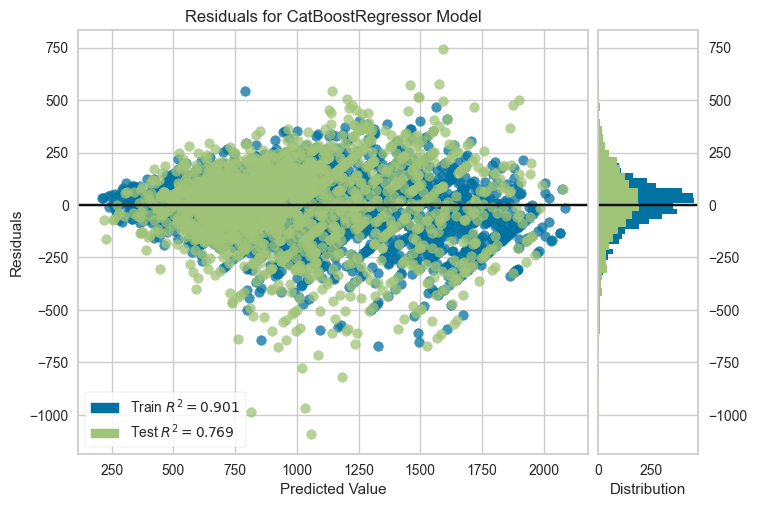

In [48]:
plot_model(catboost)

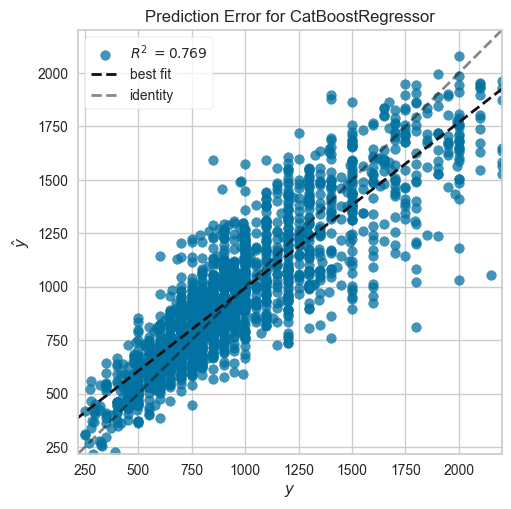

In [56]:
plot_model(catboost,plot='error')

Feature Importance

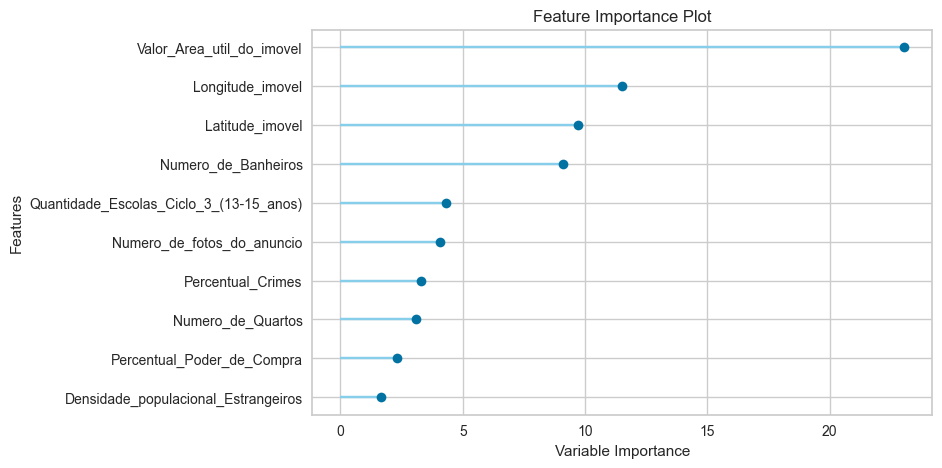

In [49]:
plot_model(catboost, plot='feature')

Valor_area_util_do_imovel é a variável que mais influencia no valor do arrendamento, 
seguido por Longitude, Latitude e Numero de banheiros. 


In [51]:
# base de teste (oot)
X_test = get_config('X_test')
X_test.head()

,Indicador_de_Elevador,Distrito_do_imovel,Tipo_de_Certificacao_Energetica,Nome_Regiao,Nome_Cidade,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Latitude_imovel,Longitude_imovel,Tipo_de_Construcao,...,Percentual_Poder_de_Compra,Percentual_Crimes,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional
5574,com elevador,PORTO,d,Norte,PORTO,140,0,41.157734,-8.643344,3,...,154.000000,56.200001,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2
790,Não Informado,FARO,c,Algarve,FARO,110,0,37.114037,-8.265055,3,...,130.600006,46.900002,29,37.016273,-7.935177,215.500000,462.600006,22,44.0,2
4973,Não Informado,PORTO,inProcess,Norte,PORTO,50,0,41.162064,-8.603875,3,...,154.000000,56.200001,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2
5587,com elevador,PORTO,d,Norte,PORTO,110,2,41.198135,-8.697906,3,...,154.000000,56.200001,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2
4143,com elevador,PORTO,desconhecido,Norte,PORTO,70,0,41.120384,-8.602467,3,...,154.000000,56.200001,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2


In [55]:
predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,138.0108,35499.8174,188.4140,0.7685,0.1850,0.1470


,Indicador_de_Elevador,Distrito_do_imovel,Tipo_de_Certificacao_Energetica,Nome_Regiao,Nome_Cidade,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Latitude_imovel,Longitude_imovel,Tipo_de_Construcao,...,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,Preco,prediction_label
5574,com elevador,PORTO,d,Norte,PORTO,140,0,41.157734,-8.643344,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,1000.0,1358.486360
790,Não Informado,FARO,c,Algarve,FARO,110,0,37.114037,-8.265055,3,...,29,37.016273,-7.935177,215.500000,462.600006,22,44.0,2,1100.0,1047.027894
4973,Não Informado,PORTO,inProcess,Norte,PORTO,50,0,41.162064,-8.603875,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,680.0,652.583022
5587,com elevador,PORTO,d,Norte,PORTO,110,2,41.198135,-8.697906,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,950.0,1085.264955
4143,com elevador,PORTO,desconhecido,Norte,PORTO,70,0,41.120384,-8.602467,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,750.0,589.395184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,com elevador,PORTO,desconhecido,Norte,PORTO,46,0,41.160038,-8.683138,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,650.0,679.318369
4651,com elevador,PORTO,c,Norte,PORTO,82,1,41.174290,-8.591434,3,...,184,41.149452,-8.610788,274.799988,0.000000,15,6.0,2,780.0,721.027504
2338,com elevador,LISBOA,desconhecido,Area Metropolitana de Lisboa,LISBOA,100,3,38.791130,-9.098609,3,...,460,38.707752,-9.136592,0.000000,274.799988,26,1.0,1,1500.0,1345.737044
2779,Não Informado,LISBOA,c,Area Metropolitana de Lisboa,LISBOA,72,0,38.731205,-9.162795,3,...,460,38.707752,-9.136592,0.000000,274.799988,26,1.0,1,825.0,976.661048


In [58]:
# Finalize model
catboost_final = finalize_model(catboost)

In [59]:
catboost_final

Pipeline(memory=FastMemory(location=C:\Users\johns\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Valor_Area_util_do_imovel',
                                             'Numero_Andar_do_imovel',
                                             'Latitude_imovel',
                                             'Longitude_imovel',
                                             'Tipo_de_Construcao',
                                             'Numero_de_Banheiros',
                                             'Possui_Jardim', 'Possui_Elevador',
                                             'Possui_Estacionamento',
                                             'Possui_Piscina', 'Possui_...
                                             'Nome_Regiao', 'Nome_Cidade'],
                                    transformer=OneHotEncoder(cols=['Indicador_de_Elevador',
                                                                    'Distrito_do_imovel',
                                                                    'Tipo_de_Certificacao_Energetica',
                                                                    'Nome_Regiao',
                                                                    'Nome_Cidade'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 <catboost.core.CatBoostRegressor object at 0x00000242C62B79D0>)])

O PyCaret é uma excelente ferramenta para prototipagem ágil destinada a analistas experientes.

Contudo, ele apresenta algumas restrições. Neste banco de dados específico, encontramos problemas ao tentar calcular os 
valores Shapley do modelo devido a um bug na biblioteca. Assim, seria imprescindível recorrer a bibliotecas mais 
convencionais para realizar as estimativas.